# This is for disparity from depth maps
There is a few different options for opening the images, ranging from PIL, pillow, OpenCV to matplotlib

In [1]:
#Import relevant modules
import os

from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Populating the interactive namespace from numpy and matplotlib


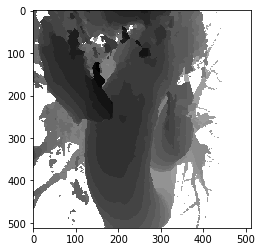

In [76]:
#Setup locations
base_dir = ""
file_name = "depth.png"
image_location = os.path.join(base_dir, file_name)

#Note that these seem to produce rather different results
depth = Image.open(image_location)
depth.load()
data = np.asarray( depth, dtype="int32" )
img = mpimg.imread(image_location)
imgplot = plt.imshow(img, cmap=plt.cm.gray)

In [74]:
# Experiments
type(depth)
type(data)
type(img)

data
img
data[0][500]
data[200][100]
img.shape

PIL.PngImagePlugin.PngImageFile

numpy.ndarray

numpy.ndarray

array([[238, 238, 238, ..., 255, 255, 255],
       [238, 238, 238, ..., 255, 255, 255],
       [238, 238, 238, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

array([[ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]], dtype=float32)

255

234

(512, 512)

In [60]:
def depth_to_disparity(depth_value, baseline, focal_length, shift = 0.0):
    """
    Returns a disparity value from a depth value
    
    Keyword arguments:
    baseline -- the distance between neighbouring cameras in the grid
    focal_length -- the depth image capturing camera's focal length
    shift -- an optional distance between neighbouring images 
          -- principal point offsets (default 0.0),
          -- note that this is from the HCI paper on their capture process
    """
    disparity = (baseline * focal_length) / depth_value - shift
    return disparity

array([[ 1.82142866,  1.82142866,  1.82142866, ...,  1.70000005,
         1.70000005,  1.70000005],
       [ 1.82142866,  1.82142866,  1.82142866, ...,  1.70000005,
         1.70000005,  1.70000005],
       [ 1.82142866,  1.82142866,  1.82142866, ...,  1.70000005,
         1.70000005,  1.70000005],
       ..., 
       [ 1.70000005,  1.70000005,  1.70000005, ...,  1.70000005,
         1.70000005,  1.70000005],
       [ 1.70000005,  1.70000005,  1.70000005, ...,  1.70000005,
         1.70000005,  1.70000005],
       [ 1.70000005,  1.70000005,  1.70000005, ...,  1.70000005,
         1.70000005,  1.70000005]], dtype=float32)

array([[ 0.00714286,  0.00714286,  0.00714286, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00714286,  0.00714286,  0.00714286, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00714286,  0.00714286,  0.00714286, ...,  0.00666667,
         0.00666667,  0.00666667],
       ..., 
       [ 0.00666667,  0.00666667,  0.00666667, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00666667,  0.00666667,  0.00666667, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00666667,  0.00666667,  0.00666667, ...,  0.00666667,
         0.00666667,  0.00666667]])

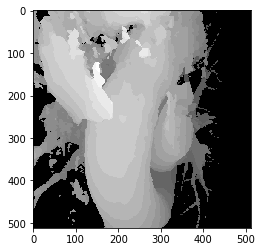

In [86]:
disparity = depth_to_disparity(img, baseline = 1, focal_length = 1.7, shift = 0)
disparity2 = depth_to_disparity(data, baseline = 1, focal_length = 1.7, shift = 0)
#imgplot = plt.imshow(disparity, cmap=plt.cm.gray)
imgplot2 = plt.imshow(disparity2, cmap= plt.cm.gray)
disparity
disparity2

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

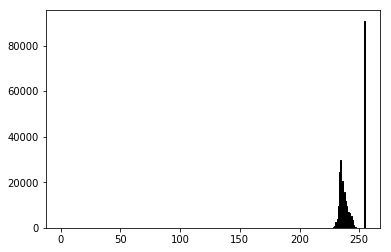

In [87]:
plt.hist(data.ravel(), bins=256, range=(0, 255), fc='k', ec='k')